In [ ]:

def classify_water_status(soil_moisture, air_humidity, air_temperature):
    # Classify based on soil moisture levels
    if 600 < soil_moisture < 1000:
        soil_status = "Dry"
        water_status = "Increase water (1% to 42%)"
    elif 370 <= soil_moisture <= 600:
        soil_status = "Humid"
        water_status = "Water level is good (42% to 63%)"
    elif soil_moisture < 370:
        soil_status = "Sensor in water"
        water_status = "Water wasted (63% to 99%)"
    else:
        soil_status = "Invalid sensor value"
        water_status = "Check sensor"

    # Additional classification based on humidity and temperature
    if air_humidity > 75:
        if air_temperature > 26:
            climate_condition = "High humidity and high temperature"
            climate_status = "Check for mold and bacteria growth, increase air circulation"
        else:
            climate_condition = "High humidity and low temperature"
            climate_status = "Risk of plant rot, maintain air circulation"
    else:
        if air_temperature > 26:
            climate_condition = "Low humidity and high temperature"
            climate_status = "Increase water and fertilizer, risk of increased transpiration"
        else:
            climate_condition = "Low humidity and low temperature"
            climate_status = "Optimal conditions, maintain current settings"

    return {
        "soil_status": soil_status,
        "water_status": water_status,
        "climate_condition": climate_condition,
        "climate_status": climate_status
}


# Generating Time Feature


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
# Load data
file_path = '/content/drive/MyDrive/PredictPlanetWatering/Dataset/dataset.csv'
df = pd.read_csv(file_path)

In [75]:
df.head()

,Soil Moisture,Temperature,Air Humidity,Pump Data
0,683.802906,29.184908,71.789699,0
1,408.571567,33.707205,77.977391,1
2,659.092074,24.760311,60.776282,1
3,842.929764,32.738515,59.323543,0
4,414.199320,25.692744,66.624914,1


In [76]:
df.drop('Pump Data', axis=1, inplace=True)


In [77]:
df.head(10)

,Soil Moisture,Temperature,Air Humidity
0,683.802906,29.184908,71.789699
1,408.571567,33.707205,77.977391
2,659.092074,24.760311,60.776282
3,842.929764,32.738515,59.323543
4,414.199320,25.692744,66.624914
5,487.521226,33.806809,47.774693
6,820.856733,32.659495,40.317592
7,726.504807,38.083939,50.915951
8,939.915978,35.430747,60.822721
9,628.397718,34.232923,42.994402


If the sensor value is more than 600 but less than 1000 then the soil is dry. -> 1% to 42% increase water <br>
If the sensor value is 370 to 600 then the soil is humid. 42% to 63% level of water is good <br>
If the sensor value is less than 370 then the sensor in the water. -> 63% to 99%  water wasted

In [8]:
df['Soil Moisture'] = 100 - (df['Soil Moisture'] * 100 / 1023)


In [9]:
df.head(10)


,Soil Moisture,Temperature,Air Humidity
0,33.157096,29.184908,71.789699
1,60.061430,33.707205,77.977391
2,35.572622,24.760311,60.776282
3,17.602174,32.738515,59.323543
4,59.511308,25.692744,66.624914
5,52.343966,33.806809,47.774693
6,19.759850,32.659495,40.317592
7,28.982912,38.083939,50.915951
8,8.121605,35.430747,60.822721
9,38.573048,34.232923,42.994402


In [10]:
# # Assuming the dataset is sampled at regular intervals
# df['Time'] = pd.date_range(start='2023-01-01', periods=len(df), freq='5H')

In [78]:
# df.head(10)

If the sensor value is more than 600 but less than 1000 then the soil is dry. -> 1% to 42% increase water <br>
If the sensor value is 370 to 600 then the soil is humid. 42% to 63% level of water is good <br>
If the sensor value is less than 370 then the sensor in the water. -> 63% to 99%  water wasted

In [81]:
# Set thresholds
soil_moisture_threshold = 42
temperature_threshold = 25
humidity_threshold = 50

In [82]:
#labeling
# Define function to label the data
def label_data(row):
    if row['Soil Moisture'] < soil_moisture_threshold:
        return 1  # Increase water
    elif row['Soil Moisture'] > soil_moisture_threshold and row['Temperature'] > temperature_threshold and row['Air Humidity'] < humidity_threshold:
        return 2  # Decrease water
    else:
        return 0  # Water wasted


# Apply function to label the data
df['Water_Status'] = df.apply(label_data, axis=1)

# Features and target
X = df[['Soil Moisture', 'Temperature', 'Air Humidity']]
y = df['Water_Status']

# Exploratory Data Analysis (EDA):

### Visualize distributions of each feature

In [83]:
# Set plot style
sns.set(style="whitegrid")

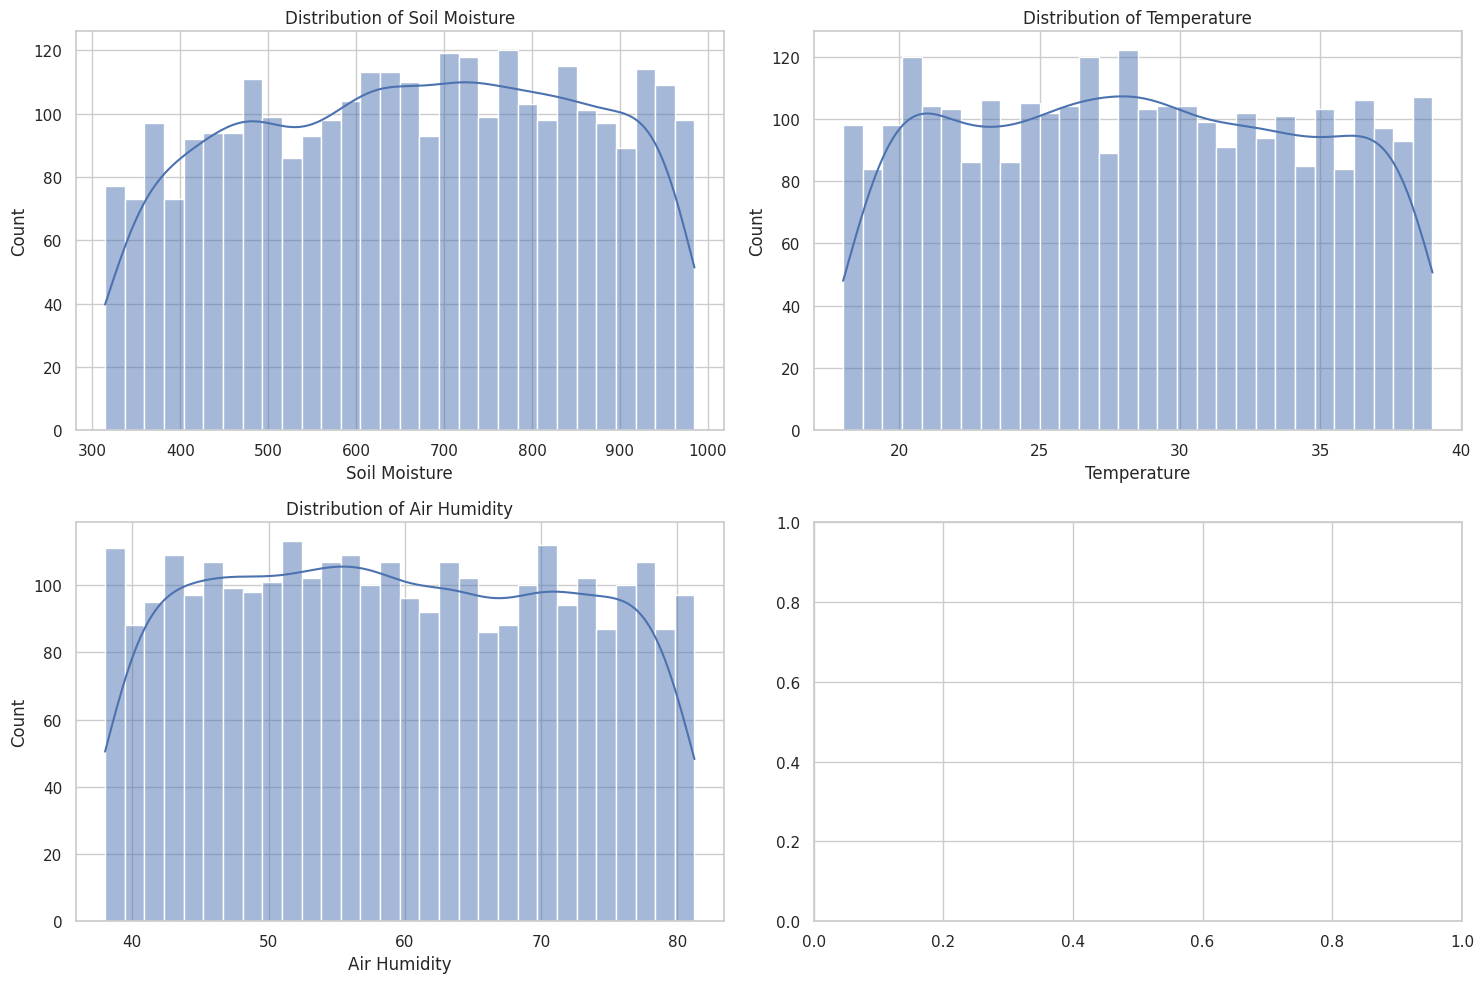

In [84]:
# Visualize distributions of each feature
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Soil Moisture'], bins=30, kde=True, ax=axs[0, 0]).set_title('Distribution of Soil Moisture')
sns.histplot(df['Temperature'], bins=30, kde=True, ax=axs[0, 1]).set_title('Distribution of Temperature')
sns.histplot(df['Air Humidity'], bins=30, kde=True, ax=axs[1, 0]).set_title('Distribution of Air Humidity')
# sns.histplot(df['Pump Data'], bins=2, kde=False, ax=axs[1, 1]).set_title('Distribution of Pump Data')

plt.tight_layout()
plt.show()

### Check for correlations

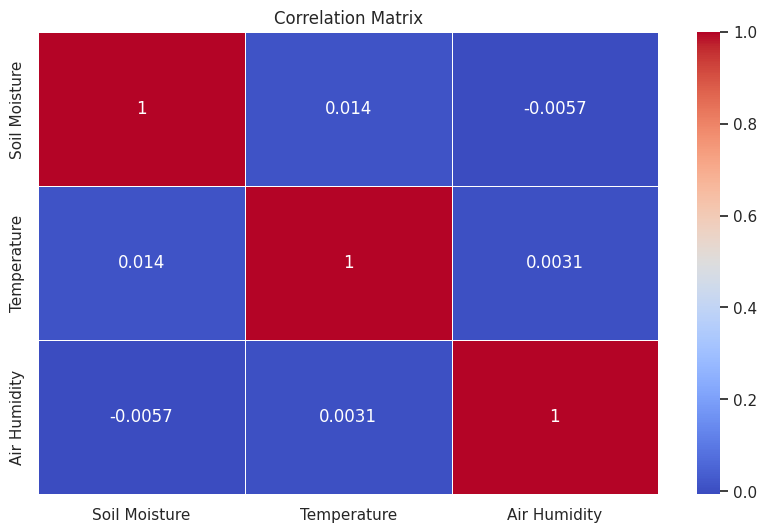

In [85]:
correlation_matrix = df[['Soil Moisture', 'Temperature', 'Air Humidity']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [41]:
# # Plot trends over time
# fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# sns.lineplot(x='Time', y='Soil Moisture', data=df, ax=axs[0]).set_title('Soil Moisture Over Time')
# sns.lineplot(x='Time', y='Temperature', data=df, ax=axs[1]).set_title('Temperature Over Time')
# sns.lineplot(x='Time', y='Air Humidity', data=df, ax=axs[2]).set_title('Air Humidity Over Time')
# # sns.lineplot(x='Time', y='Pump Data', data=df, ax=axs[3]).set_title('Pump Data Over Time')

# plt.tight_layout()
# plt.show()

In [86]:
# Check for correlations
correlation_matrix = df[['Soil Moisture', 'Temperature', 'Air Humidity']].corr()
correlation_matrix

,Soil Moisture,Temperature,Air Humidity
Soil Moisture,1.000000,0.013642,-0.005748
Temperature,0.013642,1.000000,0.003129
Air Humidity,-0.005748,0.003129,1.000000


# Label Creation:

In [43]:
# Set thresholds
soil_moisture_threshold = 60
temperature_threshold = 25
humidity_threshold = 50

In [44]:
# Define function to label the data
def label_data(row):
    if row['Soil Moisture'] < soil_moisture_threshold:
        return 1  # Increase water
    elif row['Soil Moisture'] > soil_moisture_threshold and row['Temperature'] > temperature_threshold and row['Air Humidity'] < humidity_threshold:
        return 2  # Decrease water
    else:
        return 0  # Water wasted

In [45]:
# Apply function to label the data
df['Water_Status'] = df.apply(label_data, axis=1)


In [21]:


# Display the first few rows to check the labels
print(df.head(10))

   Soil Moisture  Temperature  Air Humidity  Water_Status
0      33.157096    29.184908     71.789699             1
1      60.061430    33.707205     77.977391             0
2      35.572622    24.760311     60.776282             1
3      17.602174    32.738515     59.323543             1
4      59.511308    25.692744     66.624914             1
5      52.343966    33.806809     47.774693             1
6      19.759850    32.659495     40.317592             1
7      28.982912    38.083939     50.915951             1
8       8.121605    35.430747     60.822721             1
9      38.573048    34.232923     42.994402             1


0 for "water wasted"<br>
1 for "increase water"<br>
2 for "decrease water"


# Classification Model:

### Prepare the data: Split the data into features (X) and the target variable (y)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

In [23]:
# Prepare the data
X = df[['Soil Moisture', 'Temperature', 'Air Humidity']]
y = df['Water_Status']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

In [26]:
# Initialize results dictionary
results = {}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Use StratifiedKFold


In [27]:
for model_name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[model_name] = {
        "Cross-Validation Accuracy": np.mean(cv_results),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }


In [28]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {metrics['Cross-Validation Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("\n")

Model: Decision Tree
Cross-Validation Accuracy: 0.9985714285714286
Test Accuracy: 0.9977777777777778
Precision: 0.997830065359477
Recall: 0.9977777777777778
F1 Score: 0.9977256458138812
Confusion Matrix:
[[ 83   0   0]
 [  0 799   0]
 [  2   0  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       1.00      1.00      1.00       799
           2       1.00      0.89      0.94        18

    accuracy                           1.00       900
   macro avg       0.99      0.96      0.98       900
weighted avg       1.00      1.00      1.00       900



Model: Random Forest
Cross-Validation Accuracy: 0.9990476190476191
Test Accuracy: 0.9977777777777778
Precision: 0.997830065359477
Recall: 0.9977777777777778
F1 Score: 0.9977256458138812
Confusion Matrix:
[[ 83   0   0]
 [  0 799   0]
 [  2   0  16]]
Classification Report:
              precision    recall  f1-score   support

           0    

In [29]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [30]:
# Check label distribution
label_distribution = df['Water_Status'].value_counts()
print("Label distribution:")
print(label_distribution)

Label distribution:
Water_Status
1    2657
0     291
2      52
Name: count, dtype: int64


In [31]:
# !pip uninstall scikit-learn -y
# !pip install scikit-learn==1.2.2



In [32]:
from sklearn.model_selection import GridSearchCV


In [33]:
# Check feature importance for Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
feature_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature Importance:")
print(feature_importance)

Feature Importance:
               Importance
Soil Moisture    0.879352
Temperature      0.044861
Air Humidity     0.075787


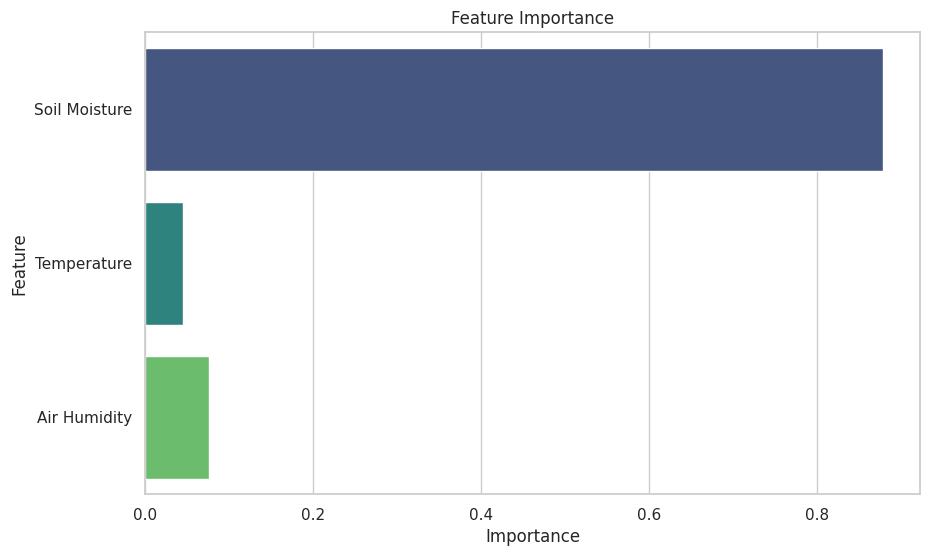

In [35]:
# Create a DataFrame for feature importances
feature_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance'])

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [36]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [37]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [38]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [39]:
best_rf = grid_search.best_estimator_


In [40]:
# Evaluate the tuned model
y_pred_tuned = best_rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

Confusion Matrix:
[[ 83   0   0]
 [  0 799   0]
 [  2   0  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       1.00      1.00      1.00       799
           2       1.00      0.89      0.94        18

    accuracy                           1.00       900
   macro avg       0.99      0.96      0.98       900
weighted avg       1.00      1.00      1.00       900



### Add Noise or Regularization


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [47]:
# Build neural network with dropout layers
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(3, activation='softmax'))

In [48]:
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [49]:
# Train the neural network
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
66/66 [==============================] - 1s 7ms/step - loss: 2.6492 - accuracy: 0.8019 - val_loss: 0.3283 - val_accuracy: 0.8889
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 1.0577 - accuracy: 0.8395 - val_loss: 0.2571 - val_accuracy: 0.8978
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.8505 - val_loss: 0.2460 - val_accuracy: 0.9011
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.8638 - val_loss: 0.2635 - val_accuracy: 0.8989
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8714 - val_loss: 0.2758 - val_accuracy: 0.9089
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8743 - val_loss: 0.3225 - val_accuracy: 0.9000
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8824 - val_loss: 0.2792 - val_accuracy: 0.8900
Epoch 8/100
6

In [50]:
# Evaluate the neural network
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {nn_accuracy}")

29/29 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9111
Neural Network Accuracy: 0.9111111164093018


In [51]:
from joblib import dump
import os

# Directory path to save models
save_path = '/content/drive/MyDrive/Predict planet watering'

In [52]:
# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

In [53]:
# Train and save the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dump(dt_model, os.path.join(save_path, 'decision_tree_model.joblib'))

['/content/drive/MyDrive/Predict planet watering/decision_tree_model.joblib']

In [54]:
# Train and save the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
dump(rf_model, os.path.join(save_path, 'random_forest_model.joblib'))

['/content/drive/MyDrive/Predict planet watering/random_forest_model.joblib']

In [55]:
# Train and save the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
dump(gb_model, os.path.join(save_path, 'gradient_boosting_model.joblib'))

['/content/drive/MyDrive/Predict planet watering/gradient_boosting_model.joblib']

In [56]:
# Train and save the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
dump(nn_model, os.path.join(save_path, 'neural_network_model.joblib'))

['/content/drive/MyDrive/Predict planet watering/neural_network_model.joblib']

# Loading the Models and Prediction Function

In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from joblib import load

In [58]:
# Directory path where models are saved
load_path = '/content/drive/MyDrive/Predict planet watering'

In [59]:
# Load the models
decision_tree_model = load(os.path.join(load_path, 'decision_tree_model.joblib'))
random_forest_model = load(os.path.join(load_path, 'random_forest_model.joblib'))
gradient_boosting_model = load(os.path.join(load_path, 'gradient_boosting_model.joblib'))
neural_network_model = load(os.path.join(load_path, 'neural_network_model.joblib'))

In [60]:
# Function to predict water status
def predict_water_status(model, soil_moisture, temperature, air_humidity):
    input_data = np.array([[soil_moisture, temperature, air_humidity]])
    prediction = model.predict(input_data)
    status = {0: 'water wasted', 1: 'level of water is good', 2: 'decrease water'}
    return status[prediction[0]]

# test models

If the sensor value is more than 600 but less than 1000 then the soil is dry.-> increase water <br>
If the sensor value is 370 to 600 then the soil is humid.<br>
If the sensor value is less than 370 then the sensor in the water.

In [67]:
# Example inputs
soil_moisture = 65
temperature = 32
air_humidity = 32


In [68]:

# Predict using Decision Tree
dt_status = predict_water_status(decision_tree_model, soil_moisture, temperature, air_humidity)
print(f"Decision Tree Prediction: {dt_status}")

Decision Tree Prediction: decrease water


In [69]:
# Predict using Random Forest
rf_status = predict_water_status(random_forest_model, soil_moisture, temperature, air_humidity)
print(f"Random Forest Prediction: {rf_status}")

Random Forest Prediction: decrease water


In [70]:
# Predict using Gradient Boosting
gb_status = predict_water_status(gradient_boosting_model, soil_moisture, temperature, air_humidity)
print(f"Gradient Boosting Prediction: {gb_status}")

Gradient Boosting Prediction: decrease water


In [71]:
# Predict using Neural Network
nn_status = predict_water_status(neural_network_model, soil_moisture, temperature, air_humidity)
print(f"Neural Network Prediction: {nn_status}")

Neural Network Prediction: decrease water


In [72]:
import pickle

In [73]:
pickle.dump(random_forest_model, open('random_forest_model.pkl', 'wb'))


In [ ]:
# pip install skops


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import skops.io as sio
obj = sio.dump(random_forest_model, "random_forest_model.skops")

In [ ]:
unknown_types = sio.get_untrusted_types(file="random_forest_model.skops")
# investigate the contents of unknown_types, and only load if you trust
# everything you see.
random_forest_model = sio.load("random_forest_model.skops", trusted=unknown_types)